# **Assignment 1**, **dataset 3**


# Problem statement
https://archive.ics.uci.edu/dataset/73/mushroom

Additional Information

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

### Loading the dataset

In [58]:
!pip install ucimlrepo

In [59]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushrooms = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushrooms.data.features
y = mushrooms.data.targets

# metadata
print(mushrooms.metadata)

# variable information
print(mushrooms.variables)

# Make sure to split the data for validation

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

## **Exploratory Data Analysis**

The student will have to make a written analysis of the data being loaded (depending on the dataset that was assigned to them). They should apply methods of inspecting the data and make some exploratory data analysis

### Understanding the dataset

The goal here is to understand the dataset and its values. This will lay the foundation of how to approach the data processing and transformation.

In [60]:
print("Features:")
print(X.columns)
X.head()


Features:
Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [61]:

y.groupby('poisonous').size()


poisonous
e    4208
p    3916
dtype: int64

Below we can see the type and the amount of non null values. What we notice here is that for the majority of our features there are no Null values. However, as we see for the `stalk-root` feature we have 5644 non-null values out of 8124 entries in our dataset.

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

The information provided at the begining states that the `cap-color` feature is a binary value. However, as we can see below, that is not true:

In [63]:
print(X.groupby('cap-color').size())

cap-color
b     168
c      44
e    1500
g    1840
n    2284
p     144
r      16
u      16
w    1040
y    1072
dtype: int64


### Summary

Blab laablabsbaldb

## **Data Preprocessing**:

If applicable, the student will create new features from existing data to improve model performance and/or select the most relevant features for the model.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [65]:
onehot = OneHotEncoder()

X_df = pd.DataFrame()

for col in X.columns:
    colValues = X[col]
    values = onehot.fit_transform(colValues.values.reshape(-1, 1))
    values_df = pd.DataFrame(values.toarray(), columns=onehot.get_feature_names_out([col]))

    X_df = pd.concat([X_df, values_df], axis=1)

X_df.info()

print(len(X_df))

X_df.head()

y_df = y.copy()

y_df["poisonous"] = y_df["poisonous"].map(lambda x: int(1) if x == "p" else int(0))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: float64(117)
memory usage: 7.3 MB
8124


## **Data Transformation**

The student should prepare the data for the training. Augmenting, splitting, and otherwise transforming should be done here.

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, stratify=y_df, random_state=1023)

### Reducing dimensionality

Since we have many features to deal with, I will use Principal Component Analysis (PCA) to reduce the amount of dimensions.

In [67]:
from sklearn.decomposition import PCA
import numpy as np


def get_num_components(data, variance_threshold=0.95):
    """
    Determine the number of components to keep based on the explained variance ratio.
    
    :param variance_threshold: The cumulative explained variance ratio threshold.
    :return: The number of components to keep.
    """
    pca = PCA()
    pca.fit(data)

    for i, variance_ratio in enumerate(np.cumsum(pca.explained_variance_ratio_)):
        if variance_ratio >= variance_threshold:
            return i + 1

    return None

num_components = get_num_components(X_train, variance_threshold=0.95)
print(f"Number of components to keep: {num_components}")


Number of components to keep: 40


## **Model Selection**


The student should implement a simple model as a baseline to compare more complex models. The student should try more complex modes and justify their rejection or acceptance.

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


## Logistic Regression

In [69]:
logistic_regression_pipeline = Pipeline([
    ('classifier', LogisticRegression( random_state=42))
])

logistic_regression_pipeline.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('classifier', LogisticRegression(random_state=42))])

### LogisticRegression (With PCA)

In [70]:
logistic_regression_pca_pipeline = Pipeline([
    ('pca', PCA(n_components=num_components)),
    ('classifier', LogisticRegression())
])

logistic_regression_pca_pipeline.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('pca', PCA(n_components=40)),
                ('classifier', LogisticRegression())])

## Random Forest


In [71]:
num_estimators = 10

### RandomForestClassifier (Without PCA)

In [72]:
random_forest_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=num_estimators, random_state=42))
])

random_forest_pipeline.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('classifier',
                 RandomForestClassifier(n_estimators=10, random_state=42))])

### RandomForestClassifier (With PCA)

In [73]:
random_forest_pca_pipeline = Pipeline([
    ('pca', PCA(n_components=num_components)),
    ('classifier', RandomForestClassifier(n_estimators=num_estimators, random_state=42))
])

random_forest_pca_pipeline.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('pca', PCA(n_components=40)),
                ('classifier',
                 RandomForestClassifier(n_estimators=10, random_state=42))])

## **Reporting the results**

The student should report the results. Identify which features are most influential in the model’s predictions, if applicable for the dataset and model used.

In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

def evaluate_classifier(model, X_test, y_test, title="Classifier Evaluation"):
    title_display = f"------ {title} ------"
    print(title_display)
    predictions = model.predict(X_test)

    classification_report_result = classification_report(y_test, predictions)
    print("Classification Report:")
    print(classification_report_result)
    
    confusion_matrix_result = confusion_matrix(y_test, predictions)
    cm_plot = ConfusionMatrixDisplay(confusion_matrix_result, display_labels=["Edible", "Poisonous"])
    cm_plot.plot()
    plt.title(title)
    plt.show()

    print(len(title_display) * "-")

### Logistic Regression Results

------ Logistic Regression ------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



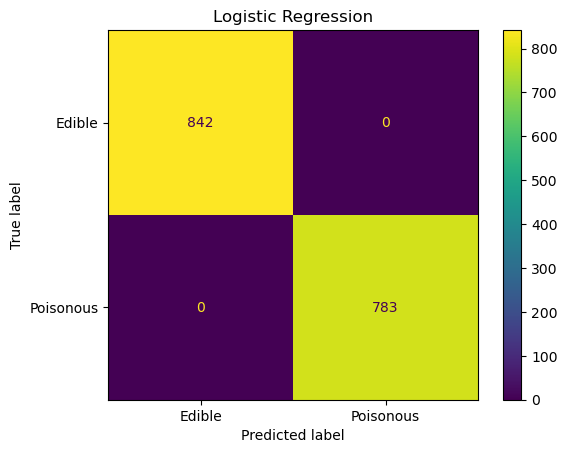

---------------------------------
------ Logistic Regression (With PCA) ------
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       842
           1       0.99      0.99      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



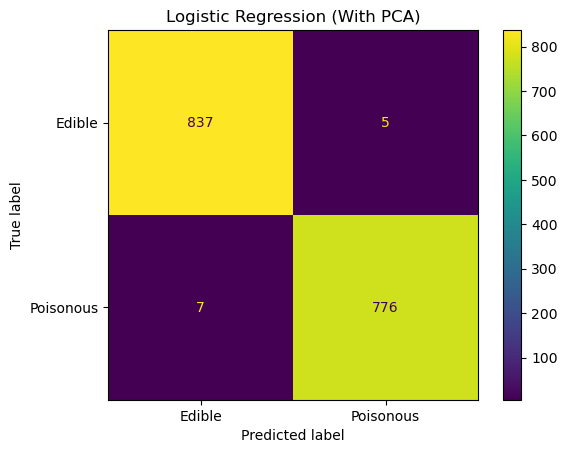

--------------------------------------------


In [75]:
evaluate_classifier(logistic_regression_pipeline, X_test, y_test, title="Logistic Regression")
evaluate_classifier(logistic_regression_pca_pipeline, X_test, y_test, title="Logistic Regression (With PCA)")


### Random Forest Classifier

------ Random Forest ------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



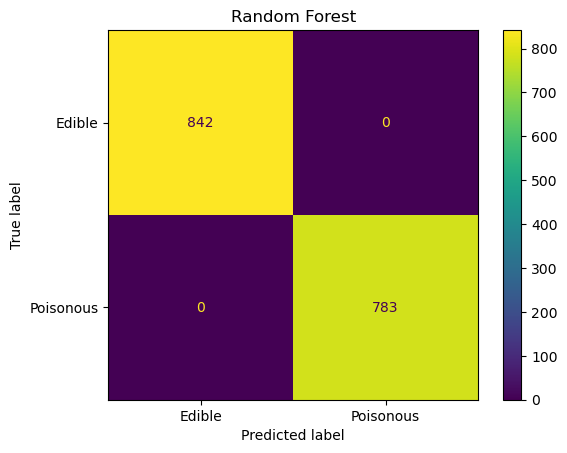

---------------------------
------ Random Forest (With PCA) ------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



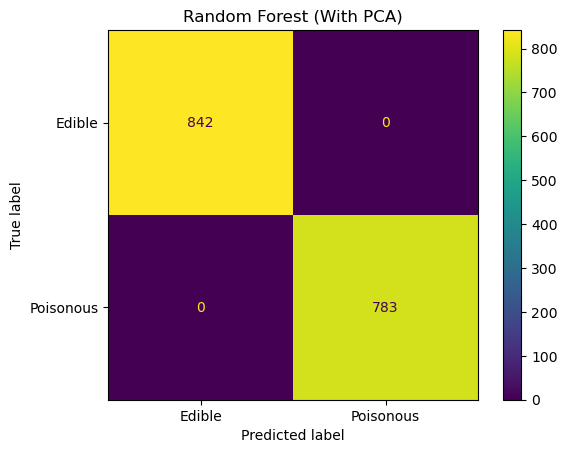

--------------------------------------


In [76]:
evaluate_classifier(random_forest_pipeline, X_test, y_test, title="Random Forest")
evaluate_classifier(random_forest_pca_pipeline, X_test, y_test, title="Random Forest (With PCA)")

**Extra**: Any additional discussion and extra work relevant for solving the problem is welcome by the student and will contribute to a better grade.

# Summary

So just to summarize what I have done in the assignmment:

### Getting to know the data

I have displayed the data to gain an understanding of the value types and which kind of value each feature can have. As can be seen most of them are categorial, and some are binary. 

I noticed that the data summary when fetch the data(the second code cell) that `cap-color` is not binary even though it says so. 

Addtionally all feature and label values is a single letter.

### Pre-processing data

In order for the classification model to work, the data had to be changed. Since all of them are categorical or binary with letter values, we can use one-hot bitencoding to change it to a interger value(as stated in the *Hands On Machine Learning with SciKit-Learn, Keras & TensorFlow* on page 67).

This obviously increases the amount of features that the dataset contains i.e. 117 features.

### Data transformation and Model selection

Since the data contains 117 features, I thought that the model may have too many features to consider (running into the curse of dimensionality). For that reason, I wanted to reduce the number of features while still maintaining the majority of the variance. 

Since there were a lot of features I had a difficult time trying to visualize which features that could be discarded.
For that reason Principal Component Analysis (PCA) seemed like the best solution. Using the `PCA` class from `sklearn`, I could create a function(see `get_num_components()`) that finds the amount of components that the PCA class has to use in order to keep a certain amount of variance. 

In order to find a good model for binary classification, I choose to use Logisitc Regression and for a more extensive and complex model i choose to use the Random Forest Classifier and a custom Neural Network.

All models runs with and without PCA as a transformation step before fitting and prediction. You can see a list below which configurations we have:

| Name |  Model  |  Dimensionality Reduction  |
|--|   ---|---|
|logistic_regression_pipeline| Logistic Regression |  None  |
| logistic_regression_pca_pipeline|   Logistic Regression   | PCA  |
| random_forrest_pipeline| Random Forest Classifier     | None  |
| random_forrest_pca_pipeline| Random Forest Classifier     | PCA  |

### Evaluation

The results can be seen in the evaluation section above. Want i do want to explain is that it seems that the `RandomForestClassifier` performing exceptionally both with and without PCA. For the `LogisticRegression` models we can see a slight difference from the model with and without PCA. The LogisticRegression model using PCA seems to be predicting with less accuracy whereas the some model without PCA performs better on the test set.

Seeing these results, I of course were afraid that it may have been overfitting. However, since the test dataset is completly separate, this does not seem to be the case. It just performs well. 

**I have not done this yet... but might be a good idea to see that it does not overfit the training set.**

However, to be certain i have used K-fold and trained the models on each fold and used the best performing option.



